<a href="https://colab.research.google.com/github/vynzk/Dt_MLS08_Vyanez/blob/main/s09_lab_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



In [ ]:
# %pip install scikit-learn
# %pip install matplotlib
# %pip install pandas
# %pip install numpy
# %pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


#PASO 1 Obtención de datos

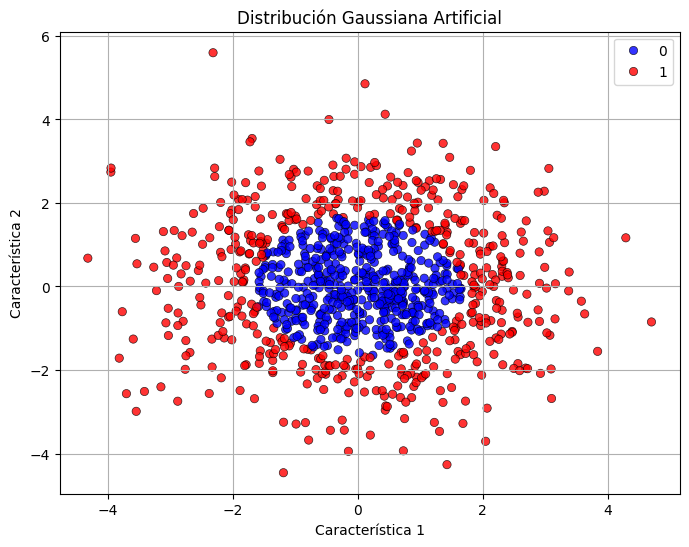

In [2]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import seaborn as sns

X, y = make_gaussian_quantiles(cov=2.0, n_samples=1000, n_features=2, n_classes=2, random_state=1)

# Visualizar los datos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={0: "blue", 1: "red"}, edgecolor='k', alpha=0.8)
plt.title("Distribución Gaussiana Artificial")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.show()

# PASO 2: Manipulación de datos


In [ ]:
from sklearn.model_selection import train_test_split

# division en entrenamiento validación y prueba (usando60%, 20%, 20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25 x 0.8 = 0.2


# PASO 3: Exploración de Datos

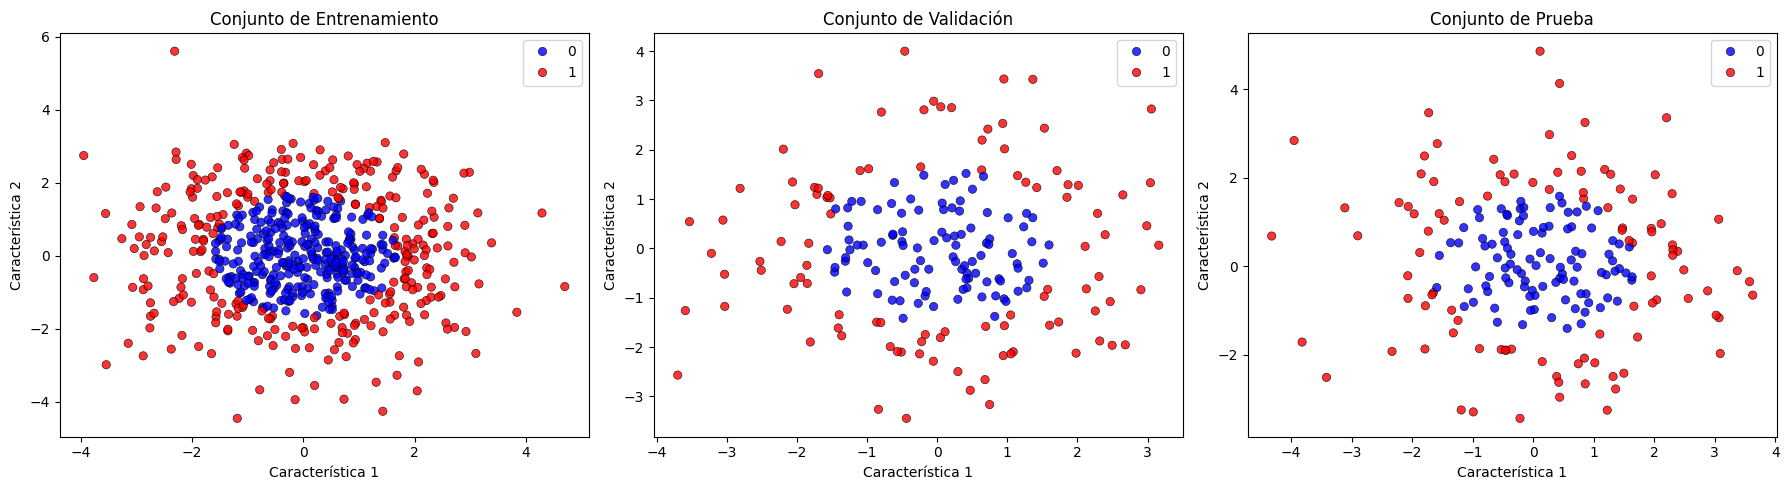

In [ ]:

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
datasets = [(X_train, y_train, "Entrenamiento"), (X_val, y_val, "Validación"), (X_test, y_test, "Prueba")]

# Vvsualizar los conjuntos de datos
for i, (data, labels, title) in enumerate(datasets):
    sns.scatterplot(ax=axs[i], x=data[:, 0], y=data[:, 1], hue=labels, palette={0: "blue", 1: "red"}, edgecolor='k', alpha=0.8)
    axs[i].set_title(f"Conjunto de {title}")
    axs[i].set_xlabel("Característica 1")
    axs[i].set_ylabel("Característica 2")

plt.tight_layout()
plt.show()


# PASO 4: Modelamiento de Datos (Machine Learning)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# entrenamiento del modelo SVM con kernel RBF
svm_clf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_clf.fit(X_train, y_train)

# Evaluación en conjunto de validación
y_val_pred = svm_clf.predict(X_val)
print("Resultados en Validación:\n", classification_report(y_val, y_val_pred))

# Evaluacion en conjunto de prueba.
y_test_pred = svm_clf.predict(X_test)
print("Resultados en Prueba:\n", classification_report(y_test, y_test_pred))


Resultados en Validación:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       1.00      0.96      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Resultados en Prueba:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       100
           1       0.96      0.99      0.98       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



# PASO 5: Interpretación de los Resultados

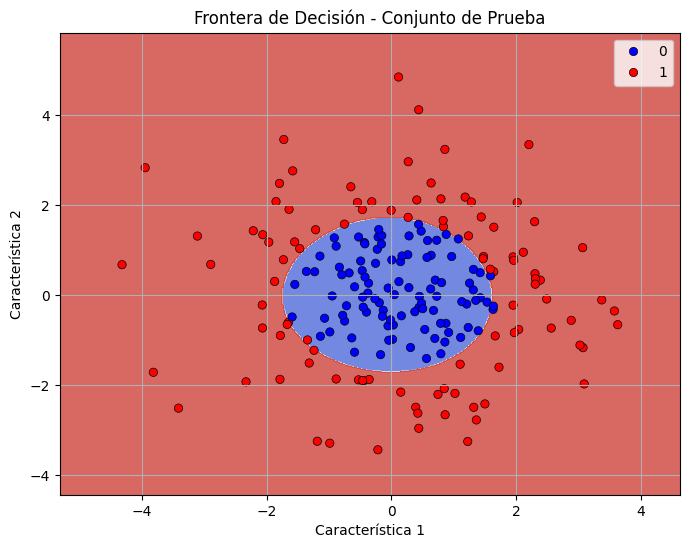

In [ ]:
import numpy as np
# Función para graficar la frontera de decisión
def plot_decision_boundary(model, X, y, title="Frontera de Decisión"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={0: "blue", 1: "red"}, edgecolor='k')
    plt.title(title)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(svm_clf, X_test, y_test, title="Frontera de Decisión - Conjunto de Prueba")


Se encontró un muy buen rendimiento en los conjutnos de validación y prueba usando el Kernel Gaussiano